In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [303]:
df_train = pd.read_csv('data/train.csv') 
df_train.fillna(0, inplace=True)
df_train.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
df_train['Survived'].replace([1], 'Yes', inplace=True)
df_train['Survived'].replace([0], 'No', inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,No,3,male,22.0,1,0,7.2500,0,S
1,Yes,1,female,38.0,1,0,71.2833,C85,C
2,Yes,3,female,26.0,0,0,7.9250,0,S
3,Yes,1,female,35.0,1,0,53.1000,C123,S
4,No,3,male,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,No,2,male,27.0,0,0,13.0000,0,S
887,Yes,1,female,19.0,0,0,30.0000,B42,S
888,No,3,female,0.0,1,2,23.4500,0,S
889,Yes,1,male,26.0,0,0,30.0000,C148,C


In [304]:
p_total = df_train.shape[0]
p_survived = df_train[df_train['Survived']=='Yes'].count()[0]
p_died = p_total - p_survived

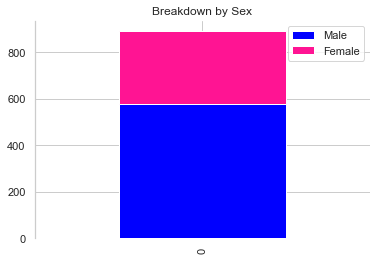

In [305]:
male = df_train.loc[df_train['Sex']=='male'].count()[1]
female = df_train.loc[df_train['Sex']=='female'].count()[1]
df_sexes = pd.DataFrame([[male, female]], columns=['Male', 'Female'])
plot = df_sexes.plot.bar(stacked=True, color=['blue', 'deeppink'])
plot.set_title('Breakdown by Sex')
plot.spines['bottom'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

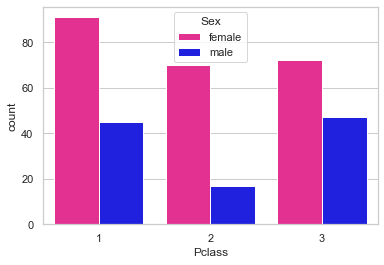

In [306]:
df_byclass=df_train[['Survived', 'Pclass', 'Sex']]
df_byclass=df_byclass[df_byclass['Survived']=='Yes']
sns.countplot(data=df_byclass, x='Pclass', hue='Sex', palette=['deeppink', 'blue'])

<AxesSubplot:>

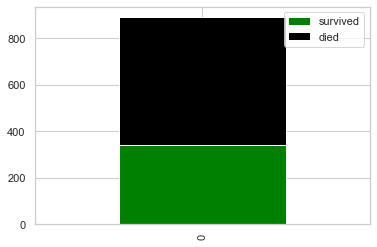

In [307]:
df_count = pd.DataFrame([[p_survived, p_died]], columns =['survived', 'died'])
df_count.plot.bar(stacked=True, color=['green', 'black'])

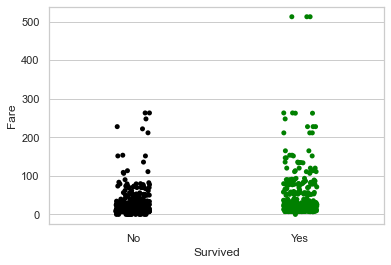

In [308]:
plot=sns.stripplot(data=df_train, x='Survived', y='Fare', palette=['black', 'green'])
plot.set_xlabel=['Yes', 'No']

<AxesSubplot:xlabel='Survived', ylabel='Age'>

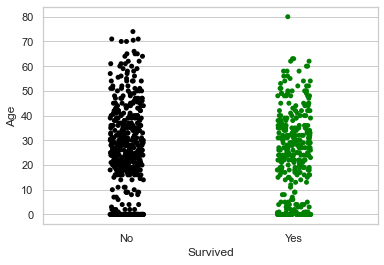

In [309]:
sns.stripplot(data=df_train, x='Survived', y='Age', palette=['black', 'green'])

In [310]:
df_test = pd.read_csv('data/test.csv')
df_test.fillna(0, inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


In [311]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,No,3,male,22.0,1,0,7.2500,0,S
1,Yes,1,female,38.0,1,0,71.2833,C85,C
2,Yes,3,female,26.0,0,0,7.9250,0,S
3,Yes,1,female,35.0,1,0,53.1000,C123,S
4,No,3,male,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,No,2,male,27.0,0,0,13.0000,0,S
887,Yes,1,female,19.0,0,0,30.0000,B42,S
888,No,3,female,0.0,1,2,23.4500,0,S
889,Yes,1,male,26.0,0,0,30.0000,C148,C


In [318]:
sex = LabelEncoder().fit(df_train['Sex']).transform(df_train['Sex'])
survived = LabelEncoder().fit(df_train['Survived']).transform(df_train['Survived'])
df_mdl = df_train.copy()
df_mdl.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
df_mdl['Sex']=[int(not(i)) for i in sex] # switching polarity has nothing to do with feminism, need it for proper correlation
df_mdl['Survived'] = survived
df_mdl

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,0.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


<AxesSubplot:>

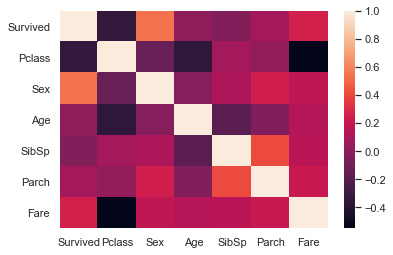

In [319]:
sns.heatmap(df_mdl.corr())

In [320]:
predictors=['Sex', 'Fare']

In [341]:
model = KMeans(n_clusters=5)

In [342]:
clusters=model.fit(df_mdl[predictors]).predict(df_mdl[predictors])

In [343]:
df_clusters = df_train.copy()
df_clusters['Cluster'] = clusters
df_clusters

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cluster
0,No,3,male,22.0,1,0,7.2500,0,S,0
1,Yes,1,female,38.0,1,0,71.2833,C85,C,3
2,Yes,3,female,26.0,0,0,7.9250,0,S,0
3,Yes,1,female,35.0,1,0,53.1000,C123,S,3
4,No,3,male,35.0,0,0,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...
886,No,2,male,27.0,0,0,13.0000,0,S,0
887,Yes,1,female,19.0,0,0,30.0000,B42,S,0
888,No,3,female,0.0,1,2,23.4500,0,S,0
889,Yes,1,male,26.0,0,0,30.0000,C148,C,0


<AxesSubplot:xlabel='Cluster', ylabel='count'>

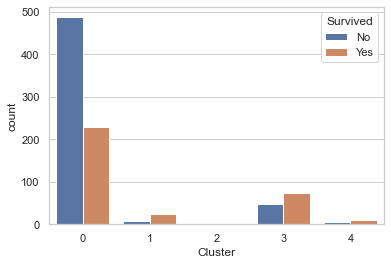

In [344]:
sns.countplot(data=df_clusters, x='Cluster', hue='Survived')